# Data Science Coursera Capstone

# Final Project

In [2]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 7.2 MB/s  eta 0:00:01


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_77942bcc71064c798c74238d2ed4b9da = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_77942bcc71064c798c74238d2ed4b9da = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_77942bcc71064c798c74238d2ed4b9da = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='k2vVM_6mTNd9oTj6gcOpOxro0znyNjJjeBTgPBTPecv6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_77942bcc71064c798c74238d2ed4b9da)

body = client_77942bcc71064c798c74238d2ed4b9da.get_object(Bucket='capstone-donotdelete-pr-c8gzwiadcc3lwi',Key='complete_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()


Libraries imported.


Borough      Neighborhoods   Latitude  Longitude  Population       City  \
0  Central    Cantonment area  12.972442  77.580643      866377  Bangalore   
1  Central             Domlur  12.960992  77.638726      743186  Bangalore   
2  Central        Indiranagar  12.971891  77.641151      474289  Bangalore   
3  Central  Jeevanbheemanagar  12.962900  77.659500      527874  Bangalore   
4  Central        Malleswaram  13.003100  77.564300      893629  Bangalore   

   AverageIncome  
0   18944.099792  
1   56837.022198  
2   41991.817435  
3    6667.447632  
4   53270.063892

In [4]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()
#bangalore_population.to_csv('data/population_dataset.csv')

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [5]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [6]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [7]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [8]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [9]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [10]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [11]:
borough_colors

{'Central': '#16F7CF',
 'Eastern': '#4C8B74',
 'NorthEastern': '#86B9E4',
 'Northern': '#07EF5B',
 'SouthEastern': '#515EE1',
 'Southern': '#229EE9',
 'SouthernSuburbs': '#3255DF',
 'Western': '#879688'}

In [12]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [13]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [14]:
bangalore_map

## FourSqaure API for Locating Neighborhoods 

In [15]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [16]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [17]:
bangalore_venues.head(5)

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
0  Cantonment area  Central              12.972442               77.580643   
1  Cantonment area  Central              12.972442               77.580643   
2  Cantonment area  Central              12.972442               77.580643   
3  Cantonment area  Central              12.972442               77.580643   
4  Cantonment area  Central              12.972442               77.580643   

              Venue  Venue Latitude  Venue Longitude      Venue Category  
0    Hotel Fishland       12.975569        77.578592  Seafood Restaurant  
1      Adigas Hotel       12.973554        77.579161          Restaurant  
2    Vasudev Adigas       12.973707        77.579257   Indian Restaurant  
3  Sapna Book House       12.976355        77.578461           Bookstore  
4  Kamat Yatrinivas       12.975985        77.578125   Indian Restaurant

In [18]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       107
Café                     30
Fast Food Restaurant     29
Bakery                   24
Ice Cream Shop           20
Pizza Place              18
Department Store         17
Chinese Restaurant       16
Coffee Shop              15
Hotel                    12
Name: Neighborhood, dtype: int64

## Venue Information According to Areas

In [19]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             6
                Domlur                     11
                Indiranagar                61
                Jeevanbheemanagar           4
                Malleswaram                 6
                Pete area                   4
                Rajajinagar                13
                Sadashivanagar             18
                Seshadripuram              10
                Shivajinagar               12
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  22
                CV Raman Nagar              7
                Hoodi                       4
                Krishnarajapuram            2
                Mahadevapura                5
                Marathahalli                8
                Varthur                     2
                Whitefield                  9
NorthEastern    Banaswadi                   5
                HBR Layout                  4
                Horamavu                    2
                Kammanahalli               10
                Lingarajapuram              1
                Ramamurthy Nagar            4
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  10
                R. T. Nagar                 7
                Vidyaranyapura              1
                Yelahanka                   6
                Yeshwanthpur                8
SouthEastern    BTM Layout                 34
                Bommanahalli                4
                Bommasandra                 2
                Electronic City             5
                HSR Layout                  9
                Koramangala                 6
                Madiwala                   23
Southern        Banashankari                7
                Basavanagudi                8
                Girinagar                   3
                J. P. Nagar                23
                Jayanagar                  13
                Kumaraswamy Layout         10
                Padmanabhanagar             4
                Uttarahalli                11
SouthernSuburbs Arekere                    23
                Begur                       3
                Gottigere                   5
                Hulimavu                    4
                Kothnur                     5
Western         Basaveshwaranagar          20
                Kamakshipalya               3
                Kengeri                     6
                Mahalakshmi Layout         11
                Nagarbhavi                  8
                Nandini Layout              2
                Nayandahalli                3
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

In [20]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)
individual_bangalore_venue_count

Borough          Neighborhood  NumberOfVenues
0           Central       Cantonment area               6
1           Central                Domlur              11
2           Central           Indiranagar              61
3           Central     Jeevanbheemanagar               4
4           Central           Malleswaram               6
5           Central             Pete area               4
6           Central           Rajajinagar              13
7           Central        Sadashivanagar              18
8           Central         Seshadripuram              10
9           Central          Shivajinagar              12
10          Central                Ulsoor               4
11          Central         Vasanth Nagar              26
12          Eastern             Bellandur              22
13          Eastern        CV Raman Nagar               7
14          Eastern                 Hoodi               4
15          Eastern      Krishnarajapuram               2
16          Eastern          Mahadevapura               5
17          Eastern          Marathahalli               8
18          Eastern               Varthur               2
19          Eastern            Whitefield               9
20     NorthEastern             Banaswadi               5
21     NorthEastern            HBR Layout               4
22     NorthEastern              Horamavu               2
23     NorthEastern          Kammanahalli              10
24     NorthEastern        Lingarajapuram               1
25     NorthEastern      Ramamurthy Nagar               4
26         Northern                Hebbal               7
27         Northern             Jalahalli               3
28         Northern             Mathikere              10
29         Northern           R. T. Nagar               7
30         Northern        Vidyaranyapura               1
31         Northern             Yelahanka               6
32         Northern          Yeshwanthpur               8
33     SouthEastern            BTM Layout              34
34     SouthEastern          Bommanahalli               4
35     SouthEastern           Bommasandra               2
36     SouthEastern       Electronic City               5
37     SouthEastern            HSR Layout               9
38     SouthEastern           Koramangala               6
39     SouthEastern              Madiwala              23
40         Southern          Banashankari               7
41         Southern          Basavanagudi               8
42         Southern             Girinagar               3
43         Southern           J. P. Nagar              23
44         Southern             Jayanagar              13
45         Southern    Kumaraswamy Layout              10
46         Southern       Padmanabhanagar               4
47         Southern           Uttarahalli              11
48  SouthernSuburbs               Arekere              23
49  SouthernSuburbs                 Begur               3
50  SouthernSuburbs             Gottigere               5
51  SouthernSuburbs              Hulimavu               4
52  SouthernSuburbs               Kothnur               5
53          Western     Basaveshwaranagar              20
54          Western         Kamakshipalya               3
55          Western               Kengeri               6
56          Western    Mahalakshmi Layout              11
57          Western            Nagarbhavi               8
58          Western        Nandini Layout               2
59          Western          Nayandahalli               3
60          Western  Rajarajeshwari Nagar               6
61          Western           Vijayanagar               4

[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

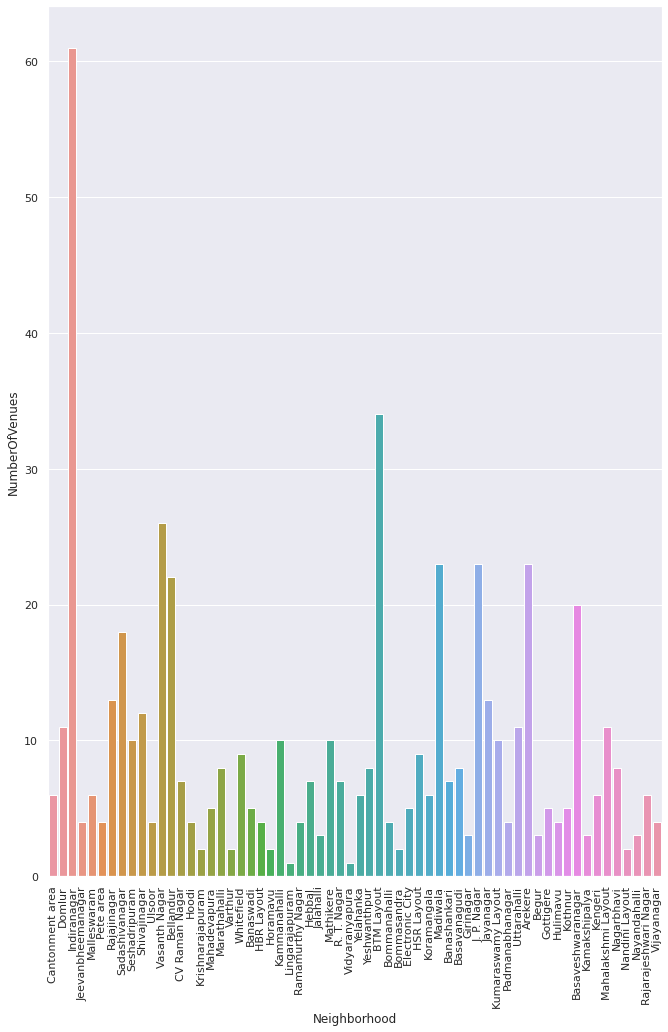

In [21]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

## Let us understand "Ulsoor" area

In [67]:
bangalore_venues[bangalore_venues['Neighborhood']=='Usloor']

Empty DataFrame
Columns: [Neighborhood, Borough, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

In [68]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

Venue Category_ATM  Venue Category_Andhra Restaurant  \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
5                     0                                 0   
6                     0                                 0   
7                     0                                 0   
8                     0                                 0   
9                     0                                 0   
10                    0                                 0   
11                    0                                 0   
12                    0                                 0   
13                    0                                 0   
14                    0                                 0   
15                    0                                 0   
16                    0                                 0   
17                    0                                 0   
18                    0                                 0   
19                    0                                 0   
20                    0                                 0   
21                    0                                 0   
22                    0                                 0   
23                    0                                 0   
24                    0                                 0   
25                    0                                 0   
26                    0                                 0   
27                    0                                 0   
28                    0                                 0   
29                    0                                 0   
30                    0                                 0   
31                    0                                 0   
32                    0                                 0   
33                    0                                 0   
34                    0                                 0   
35                    0                                 0   
36                    0                                 0   
37                    0                                 0   
38                    0                                 0   
39                    0                                 0   
40                    0                                 0   
41                    0                                 0   
42                    0                                 0   
43                    0                                 0   
44                    0                                 0   
45                    0                                 0   
46                    0                                 0   
47                    0                                 0   
48                    0                                 0   
49                    0                                 0   
50                    0                                 0   
51                    0                                 0   
52                    0                                 0   
53                    0                                 0   
54                    0                                 0   
55                    0                                 0   
56                    0                                 0   
57                    0                                 0   
58                    0                                 0   
59                    0                                 0   
60                    0                                 0   
61                    0                                 0   
62                    0                                 0   
63                    0                                 0   
64                    0                 

In [69]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

Neighborhood  Venue Category_ATM  \
0                Arekere            0.000000   
1             BTM Layout            0.000000   
2           Banashankari            0.000000   
3              Banaswadi            0.000000   
4           Basavanagudi            0.000000   
5      Basaveshwaranagar            0.000000   
6                  Begur            0.000000   
7              Bellandur            0.000000   
8           Bommanahalli            0.000000   
9            Bommasandra            0.500000   
10        CV Raman Nagar            0.000000   
11       Cantonment area            0.000000   
12                Domlur            0.000000   
13       Electronic City            0.000000   
14             Girinagar            0.000000   
15             Gottigere            0.000000   
16            HBR Layout            0.000000   
17            HSR Layout            0.000000   
18                Hebbal            0.000000   
19                 Hoodi            0.000000   
20              Horamavu            0.000000   
21              Hulimavu            0.000000   
22           Indiranagar            0.000000   
23           J. P. Nagar            0.000000   
24             Jalahalli            0.000000   
25             Jayanagar            0.000000   
26     Jeevanbheemanagar            0.000000   
27         Kamakshipalya            0.000000   
28          Kammanahalli            0.000000   
29               Kengeri            0.166667   
30           Koramangala            0.000000   
31               Kothnur            0.200000   
32      Krishnarajapuram            0.000000   
33    Kumaraswamy Layout            0.000000   
34        Lingarajapuram            0.000000   
35              Madiwala            0.000000   
36          Mahadevapura            0.000000   
37    Mahalakshmi Layout            0.000000   
38           Malleswaram            0.000000   
39          Marathahalli            0.000000   
40             Mathikere            0.000000   
41            Nagarbhavi            0.000000   
42        Nandini Layout            0.000000   
43          Nayandahalli            0.000000   
44       Padmanabhanagar            0.000000   
45             Pete area            0.000000   
46           R. T. Nagar            0.000000   
47           Rajajinagar            0.000000   
48  Rajarajeshwari Nagar            0.000000   
49      Ramamurthy Nagar            0.000000   
50        Sadashivanagar            0.000000   
51         Seshadripuram            0.000000   
52          Shivajinagar            0.000000   
53                Ulsoor            0.000000   
54           Uttarahalli            0.000000   
55               Varthur            0.500000   
56         Vasanth Nagar            0.000000   
57        Vidyaranyapura            0.000000   
58           Vijayanagar            0.000000   
59            Whitefield            0.000000   
60             Yelahanka            0.166667   
61          Yeshwanthpur            0.000000   

    Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                              0.000                   0.000000   
1                              0.000                   0.000000   
2                              0.000                   0.000000   
3                              0.000                   0.000000   
4                              0.000                   0.000000   
5                              0.000                   0.000000   
6                              0.000                   0.000000   
7                              0.000                   0.000000   
8                              0.000                   0.000000   
9                              0.000                   0.000000   
10                             0.000                   0.000000   
11                             0.000                   0.000000   
12                             0.000                   0.000000   
13                             0.000             

In [70]:
number_of_top_venues = 5

In [71]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.22
1  Venue Category_Sporting Goods Shop       0.17
2          Venue Category_Pizza Place       0.09
3     Venue Category_Department Store       0.09
4                  Venue Category_Bar       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.24
1           Venue Category_Snack Place       0.09
2        Venue Category_Ice Cream Shop       0.09
3  Venue Category_Fast Food Restaurant       0.06
4           Venue Category_Pizza Place       0.06


--------- Banashankari ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant       0.29
1                     Venue Category_Café       0.29
2  Venue Category_North Indian Restaurant       0.14
3           Venue Category_Clothing Store       0.14
4              Venue Category_Pizza Place    

In [72]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [73]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue  \
0       Arekere  Venue Category_Indian Restaurant   
1    BTM Layout  Venue Category_Indian Restaurant   
2  Banashankari  Venue Category_Indian Restaurant   
3     Banaswadi             Venue Category_Bakery   
4  Basavanagudi  Venue Category_Indian Restaurant   

                          2nd Most Common Venue  \
0            Venue Category_Sporting Goods Shop   
1                    Venue Category_Snack Place   
2                           Venue Category_Café   
3  Venue Category_Vegetarian / Vegan Restaurant   
4                           Venue Category_Café   

              3rd Most Common Venue  \
0   Venue Category_Department Store   
1     Venue Category_Ice Cream Shop   
2        Venue Category_Pizza Place   
3  Venue Category_Indian Restaurant   
4         Venue Category_Hookah Bar   

                          4th Most Common Venue  \
0                    Venue Category_Pizza Place   
1  Venue Category_Vegetarian / Vegan Restaurant   
2        Venue Category_North Indian Restaurant   
3                         Venue Category_Market   
4       Venue Category_Mediterranean Restaurant   

                 5th Most Common Venue              6th Most Common Venue  \
0  Venue Category_Gym / Fitness Center  Venue Category_Chinese Restaurant   
1  Venue Category_Fast Food Restaurant         Venue Category_Coffee Shop   
2        Venue Category_Clothing Store       Venue Category_Women's Store   
3         Venue Category_Women's Store          Venue Category_Food Truck   
4            Venue Category_Restaurant       Venue Category_Women's Store   

              7th Most Common Venue                8th Most Common Venue  \
0     Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
1        Venue Category_Pizza Place    Venue Category_Chinese Restaurant   
2         Venue Category_Food Truck            Venue Category_Donut Shop   
3         Venue Category_Food Court     Venue Category_Food & Drink Shop   
4  Venue Category_Fish & Chips Shop     Venue Category_Food & Drink Shop   

                        9th Most Common Venue  \
0                 Venue Category_Liquor Store   
1               Venue Category_Sandwich Place   
2  Venue Category_Eastern European Restaurant   
3                  Venue Category_Flea Market   
4                  Venue Category_Flea Market   

              10th Most Common Venue  
0                 Venue Category_Bar  
1  Venue Category_Italian Restaurant  
2   Venue Category_Electronics Store  
3   Venue Category_Fish & Chips Shop  
4  Venue Category_Falafel Restaurant

In [74]:
neighborhoods_venues_sorted.shape

(62, 11)

## K-Means Clustering

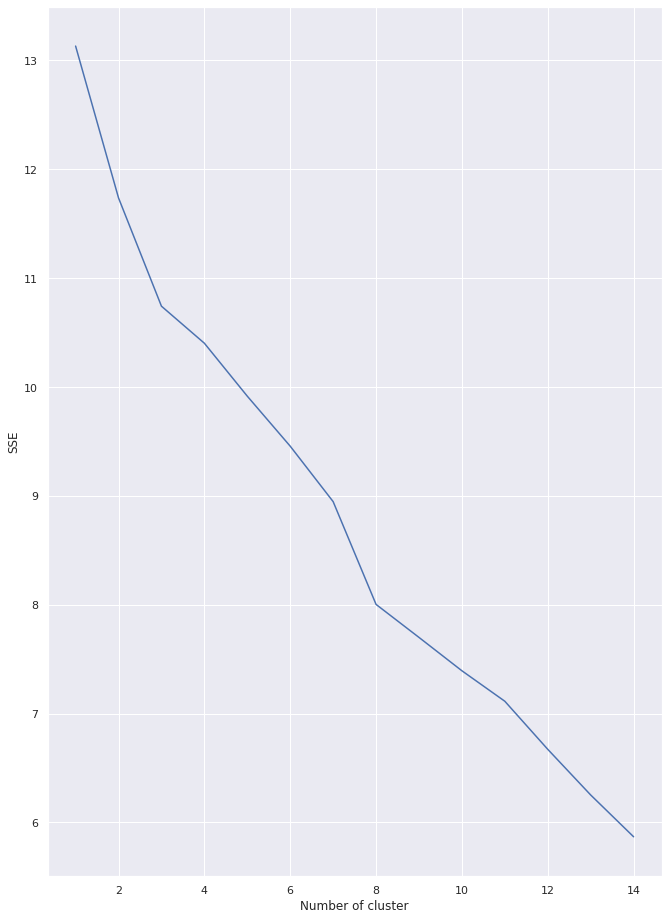

In [75]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [76]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [77]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    19
1     7
2     9
3    14
4    13
Name: Neighborhood, dtype: int64

In [78]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Sushi Restaurant', 'Venue Category_Tea Room',
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=127)

In [79]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [80]:
neighborhoods_venues_sorted.head(4)


Neighborhood             1st Most Common Venue  \
0       Arekere  Venue Category_Indian Restaurant   
1    BTM Layout  Venue Category_Indian Restaurant   
2  Banashankari  Venue Category_Indian Restaurant   
3     Banaswadi             Venue Category_Bakery   

                          2nd Most Common Venue  \
0            Venue Category_Sporting Goods Shop   
1                    Venue Category_Snack Place   
2                           Venue Category_Café   
3  Venue Category_Vegetarian / Vegan Restaurant   

              3rd Most Common Venue  \
0   Venue Category_Department Store   
1     Venue Category_Ice Cream Shop   
2        Venue Category_Pizza Place   
3  Venue Category_Indian Restaurant   

                          4th Most Common Venue  \
0                    Venue Category_Pizza Place   
1  Venue Category_Vegetarian / Vegan Restaurant   
2        Venue Category_North Indian Restaurant   
3                         Venue Category_Market   

                 5th Most Common Venue              6th Most Common Venue  \
0  Venue Category_Gym / Fitness Center  Venue Category_Chinese Restaurant   
1  Venue Category_Fast Food Restaurant         Venue Category_Coffee Shop   
2        Venue Category_Clothing Store       Venue Category_Women's Store   
3         Venue Category_Women's Store          Venue Category_Food Truck   

           7th Most Common Venue                8th Most Common Venue  \
0  Venue Category_Breakfast Spot  Venue Category_Fast Food Restaurant   
1     Venue Category_Pizza Place    Venue Category_Chinese Restaurant   
2      Venue Category_Food Truck            Venue Category_Donut Shop   
3      Venue Category_Food Court     Venue Category_Food & Drink Shop   

                        9th Most Common Venue  \
0                 Venue Category_Liquor Store   
1               Venue Category_Sandwich Place   
2  Venue Category_Eastern European Restaurant   
3                  Venue Category_Flea Market   

              10th Most Common Venue  Venue Category_ATM  \
0                 Venue Category_Bar                 0.0   
1  Venue Category_Italian Restaurant                 0.0   
2   Venue Category_Electronics Store                 0.0   
3   Venue Category_Fish & Chips Shop                 0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                           0.043478   
1                              0.0                           0.000000   
2                              0.0                           0.000000   
3                              0.0                           0.000000   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                             0.0               0.000000            0.043478   
1                             0.0               0.029412            0.000000   
2                             0.0               0.000000            0.000000   
3                             0.0               0.400000            0.000000   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   

   Venue Category_Bo

In [81]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [82]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [83]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [84]:
map_clusters

## Recommendations based on Location

In [85]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome  Normalized_income
0  Central    Cantonment area   18944.099792           0.293051
1  Central             Domlur   56837.022198           0.879225
2  Central        Indiranagar   41991.817435           0.649581
3  Central  Jeevanbheemanagar    6667.447632           0.103140
4  Central        Malleswaram   53270.063892           0.824047

In [86]:
bangalore_population.head()

Borough      Neighborhoods  Population  Normalized_population
0  Central    Cantonment area      866377               0.880810
1  Central             Domlur      743186               0.755567
2  Central        Indiranagar      474289               0.482190
3  Central  Jeevanbheemanagar      527874               0.536668
4  Central        Malleswaram      893629               0.908516

In [87]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

Borough      Neighborhoods  Population  Normalized_population
0  Central    Cantonment area      866377               0.880810
1  Central             Domlur      743186               0.755567
2  Central        Indiranagar      474289               0.482190
3  Central  Jeevanbheemanagar      527874               0.536668
4  Central        Malleswaram      893629               0.908516

In [88]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

Borough      Neighborhoods  AverageIncome  Normalized_income
0  Central    Cantonment area   18944.099792           0.293051
1  Central             Domlur   56837.022198           0.879225
2  Central        Indiranagar   41991.817435           0.649581
3  Central  Jeevanbheemanagar    6667.447632           0.103140
4  Central        Malleswaram   53270.063892           0.824047

In [89]:
bangalore_venues_grouped.head(1)

Neighborhood  Venue Category_ATM  Venue Category_Andhra Restaurant  \
0      Arekere                 0.0                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                           0.043478                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  \
0                    0.0            0.043478   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0                    0.0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                       0.0                      0.0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                       0.043478                     0.0   

   Venue Category_Burger Joint  Venue Category_Bus Station  \
0                          0.0                         0.0   

   Venue Category_Bus Stop  Venue Category_Café  Venue Category_Chaat Place  \
0                      0.0                  0.0                         0.0   

   Venue Category_Chinese Restaurant  Venue Category_Chocolate Shop  \
0                           0.043478                            0.0   

   Venue Category_Clothing Store  Venue Category_Cocktail Bar  \
0                            0.0                          0.0   

   Venue Category_Coffee Shop  Venue Category_Convenience Store  \
0                         0.0                               0.0   

   Venue Category_Coworking Space  Venue Category_Cupcake Shop  \
0                             0.0                          0.0   

   Venue Category_Deli / Bodega  Venue Category_Department Store  \
0                           0.0                         0.086957   

   Venue Category_Dessert Shop  Venue Category_Dim Sum Restaurant  \
0                          0.0                                0.0   

   Venue Category_Diner  Venue Category_Donut Shop  \
0                   0.0                        0.0   

   Venue Category_Eastern European Restaurant  \
0                                         0.0   

   Venue Category_Electronics Store  Venue Category_Falafel Restaurant  \
0                               0.0                                0.0   

   Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop  \
0                             0.043478                               0.0   

   Venue Category_Flea Market  Venue Category_Food & Drink Shop  \
0                         0.0                               0.0   

   Venue Category_Food Court  Venue Category_Food Truck  \
0                        0.0                        0.0   

   Venue Category_French Restaurant  Venue Category_Furniture / Home Store  \
0                               0.0                                    0.0   

   Venue Category_Gas Station  Venue Category_Gourmet Shop  \
0                         0.0                          0.0   

   Venue Category_Grocery Store  Venue Category_Gym  \
0                           0.0                 0.0   

   Venue Category_Gym / Fitness Center  Venue Category_Halal Restaurant  \
0                             0.043478                              0.0   

   Venue Category_Historic Site  Venue Category_Home Service  \
0                           0.0                          0.0   

   Venue Category_Hookah Bar  Venue Category_Hotel  Venue Category_Hotel Bar  \
0                        0.0                   0.0                       0.0   

   Venue Category_Hyderabadi Restaurant  Venue Category_Ice Cream Shop  \
0                                   0.0                       0.043478   

   Venue Category_Indian Chinese Restaurant  Venue Category_Indian Restaurant  \
0                                       0.0                          0.217

In [90]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

Neighborhood  Venue Category_ATM  Venue Category_Andhra Restaurant  \
0       Arekere                   0                                 0   
1    BTM Layout                   0                                 0   
2  Banashankari                   0                                 0   
3     Banaswadi                   0                                 0   
4  Basavanagudi                   0                                 0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                  1                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   Venue Category_Bakery  Venue Category_Bar  \
0                      0                   1   
1                      1                   0   
2                      0                   0   
3                      2                   0   
4                      0                   0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                              1                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   

   Venue Category_Burger Joint  Venue Category_Bus Station  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Venue Category_Bus Stop  Venue Category_Café  Venue Category_Chaat Place  \
0                        0                    0                           0   
1                        0                    1                           0   
2                        0                    2                           0   
3                        0                    0                           0   
4                        0                    1                           0   

   Venue Category_Chinese Restaurant  Venue Category_Chocolate Shop  \
0                                  1                              0   
1                            

In [91]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     2
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    2
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [92]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.head()

Neighborhood  Venue Category_Vegetarian / Vegan Restaurant
0       Arekere                                             0
1    BTM Layout                                             2
2  Banashankari                                             0
3     Banaswadi                                             1
4  Basavanagudi                                             0

In [93]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [94]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Ulsoor']
target_cluster_dataframe.reset_index()

index Neighborhood 1st Most Common Venue        2nd Most Common Venue  \
0    496       Ulsoor   Venue Category_Café  Venue Category_Burger Joint   
1    497       Ulsoor   Venue Category_Café  Venue Category_Burger Joint   
2    498       Ulsoor   Venue Category_Café  Venue Category_Burger Joint   
3    499       Ulsoor   Venue Category_Café  Venue Category_Burger Joint   

   3rd Most Common Venue         4th Most Common Venue  \
0  Venue Category_Bakery  Venue Category_Women's Store   
1  Venue Category_Bakery  Venue Category_Women's Store   
2  Venue Category_Bakery  Venue Category_Women's Store   
3  Venue Category_Bakery  Venue Category_Women's Store   

       5th Most Common Venue                       6th Most Common Venue  \
0  Venue Category_Donut Shop  Venue Category_Eastern European Restaurant   
1  Venue Category_Donut Shop  Venue Category_Eastern European Restaurant   
2  Venue Category_Donut Shop  Venue Category_Eastern European Restaurant   
3  Venue Category_Donut Shop  Venue Category_Eastern European Restaurant   

              7th Most Common Venue              8th Most Common Venue  \
0  Venue Category_Electronics Store  Venue Category_Falafel Restaurant   
1  Venue Category_Electronics Store  Venue Category_Falafel Restaurant   
2  Venue Category_Electronics Store  Venue Category_Falafel Restaurant   
3  Venue Category_Electronics Store  Venue Category_Falafel Restaurant   

                 9th Most Common Venue            10th Most Common Venue  \
0  Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop   
1  Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop   
2  Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop   
3  Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop   

   Venue Category_ATM  Venue Category_Andhra Restaurant  \
0                 0.0                               0.0   
1                 0.0                               0.0   
2                 0.0                               0.0   
3                 0.0                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  \
0                   0.25                 0.0   
1                   0.25                 0.0   
2                   0.25                 0.0   
3                   0.25                 0.0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                       0.0                      0.0   
1                       0.0                      0.0   
2                       0.0                      0.0   
3                       0.0                      0.0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                    

In [95]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
target_cluster
print("The target cluster is : ",target_cluster)
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

The target cluster is :  4


Neighborhood             1st Most Common Venue  \
0      Arekere  Venue Category_Indian Restaurant   
1      Arekere  Venue Category_Indian Restaurant   
2      Arekere  Venue Category_Indian Restaurant   
3      Arekere  Venue Category_Indian Restaurant   
4      Arekere  Venue Category_Indian Restaurant   

                2nd Most Common Venue            3rd Most Common Venue  \
0  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
1  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
2  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
3  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
4  Venue Category_Sporting Goods Shop  Venue Category_Department Store   

        4th Most Common Venue                5th Most Common Venue  \
0  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
1  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
2  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
3  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
4  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   

               6th Most Common Venue          7th Most Common Venue  \
0  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
1  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
2  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
3  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
4  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   

                 8th Most Common Venue        9th Most Common Venue  \
0  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
1  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
2  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
3  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
4  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   

  10th Most Common Venue  Venue Category_ATM  \
0     Venue Category_Bar                 0.0   
1     Venue Category_Bar                 0.0   
2     Venue Category_Bar                 0.0   
3     Venue Category_Bar                 0.0   
4     Venue Category_Bar                 0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                           0.043478   
1                              0.0                           0.043478   
2                              0.0                           0.043478   
3                              0.0                           0.043478   
4                              0.0                           0.043478   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                             0.0                    0.0            0.043478   
1                             0.0                    0.0            0.043478   
2                             0.0                    0.0            0.043478   
3                             0.0                    0.0            0.043478   
4                             0.0                    0.0            0.043478   

   Venue

In [96]:
print("There are {} neighborhoods which has similar characteristics to Usloor.".format(possible_neighborhoods.shape[0]))

There are 87 neighborhoods which has similar characteristics to Usloor.


In [97]:
possible_neighborhoods.reset_index().head()

index Neighborhood             1st Most Common Venue  \
0      0      Arekere  Venue Category_Indian Restaurant   
1      1      Arekere  Venue Category_Indian Restaurant   
2      2      Arekere  Venue Category_Indian Restaurant   
3      3      Arekere  Venue Category_Indian Restaurant   
4      4      Arekere  Venue Category_Indian Restaurant   

                2nd Most Common Venue            3rd Most Common Venue  \
0  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
1  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
2  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
3  Venue Category_Sporting Goods Shop  Venue Category_Department Store   
4  Venue Category_Sporting Goods Shop  Venue Category_Department Store   

        4th Most Common Venue                5th Most Common Venue  \
0  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
1  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
2  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
3  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   
4  Venue Category_Pizza Place  Venue Category_Gym / Fitness Center   

               6th Most Common Venue          7th Most Common Venue  \
0  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
1  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
2  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
3  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   
4  Venue Category_Chinese Restaurant  Venue Category_Breakfast Spot   

                 8th Most Common Venue        9th Most Common Venue  \
0  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
1  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
2  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
3  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   
4  Venue Category_Fast Food Restaurant  Venue Category_Liquor Store   

  10th Most Common Venue  Venue Category_ATM  \
0     Venue Category_Bar                 0.0   
1     Venue Category_Bar                 0.0   
2     Venue Category_Bar                 0.0   
3     Venue Category_Bar                 0.0   
4     Venue Category_Bar                 0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                           0.043478   
1                              0.0                           0.043478   
2                              0.0                           0.043478   
3                              0.0                           0.043478   
4                              0.0                           0.043478   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                             0.0                    0.0            0.043478   
1                             0.0                    0.0            0.043478   
2                             0.0                    0.0            0.043478   
3                             0.0                    0.0            0.043478   
4                             0.0               

In [98]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
pd.options.mode.chained_assignment = None  # default='warn'

In [99]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
#possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [100]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [101]:
recommended_neighborhoods.head()

Neighborhoods          1st Most Common Venue  \
0   Malleswaram  Venue Category_Ice Cream Shop   
1   Malleswaram  Venue Category_Ice Cream Shop   
2   Malleswaram  Venue Category_Ice Cream Shop   
3   Malleswaram  Venue Category_Ice Cream Shop   
4   Malleswaram  Venue Category_Ice Cream Shop   

              2nd Most Common Venue  3rd Most Common Venue  \
0  Venue Category_Indian Restaurant  Venue Category_Bakery   
1  Venue Category_Indian Restaurant  Venue Category_Bakery   
2  Venue Category_Indian Restaurant  Venue Category_Bakery   
3  Venue Category_Indian Restaurant  Venue Category_Bakery   
4  Venue Category_Indian Restaurant  Venue Category_Bakery   

           4th Most Common Venue      5th Most Common Venue  \
0  Venue Category_Breakfast Spot  Venue Category_Food Truck   
1  Venue Category_Breakfast Spot  Venue Category_Food Truck   
2  Venue Category_Breakfast Spot  Venue Category_Food Truck   
3  Venue Category_Breakfast Spot  Venue Category_Food Truck   
4  Venue Category_Breakfast Spot  Venue Category_Food Truck   

       6th Most Common Venue             7th Most Common Venue  \
0  Venue Category_Food Court  Venue Category_Food & Drink Shop   
1  Venue Category_Food Court  Venue Category_Food & Drink Shop   
2  Venue Category_Food Court  Venue Category_Food & Drink Shop   
3  Venue Category_Food Court  Venue Category_Food & Drink Shop   
4  Venue Category_Food Court  Venue Category_Food & Drink Shop   

        8th Most Common Venue             9th Most Common Venue  \
0  Venue Category_Flea Market  Venue Category_Fish & Chips Shop   
1  Venue Category_Flea Market  Venue Category_Fish & Chips Shop   
2  Venue Category_Flea Market  Venue Category_Fish & Chips Shop   
3  Venue Category_Flea Market  Venue Category_Fish & Chips Shop   
4  Venue Category_Flea Market  Venue Category_Fish & Chips Shop   

                10th Most Common Venue  Venue Category_ATM  \
0  Venue Category_Fast Food Restaurant                 0.0   
1  Venue Category_Fast Food Restaurant                 0.0   
2  Venue Category_Fast Food Restaurant                 0.0   
3  Venue Category_Fast Food Restaurant                 0.0   
4  Venue Category_Fast Food Restaurant                 0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                             0.0               0.166667                 0.0   
1                             0.0               0.166667                 0.0   
2                             0.0               0.166667                 0.0   
3                             0.0               0.166667                 0.0   
4                             0.0               0.166667                 0.0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0     

## Final Ranking Output based on the Factors

In [102]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [103]:
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(3)

Neighborhoods             1st Most Common Venue  \
0       Arekere  Venue Category_Indian Restaurant   
1         Begur        Venue Category_Supermarket   
2  Bommanahalli   Venue Category_Department Store   

                2nd Most Common Venue                   3rd Most Common Venue  \
0  Venue Category_Sporting Goods Shop         Venue Category_Department Store   
1                 Venue Category_Café        Venue Category_Mobile Phone Shop   
2    Venue Category_Indian Restaurant  Venue Category_South Indian Restaurant   

                 Ranking  
0  [0.22959888840700646]  
1   [0.6361321887351776]  
2   [0.4365669702740494]

### The most suitable areas for recommendation for users in "Ulsoor" are Arekere, Begur, Bommanahalli.